In [1]:
#importing the necessary libraries
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model


In [2]:
#resizing all images
IMAGE_SIZE= [224,224] #this is because the vgg16 was created such that the input images sizes is [224,224]

In [3]:

train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'

removing the output/ last layer of the VGG16 
as we dont have those a thousand outputs

In [4]:
#adding a preprocesing layer to the front of VGG16
vgg= VGG16(input_shape= IMAGE_SIZE + [3], weights='imagenet', include_top= False) #[3]is for RGB channels, and it should be [1] if black and white


In [6]:
#dont have to train existing output layers as the weights are fixed
for layer in vgg.layers:
    layer.trainable= False

In [7]:
#useful for getting number of classes
#folders= glob('Datasets/Train*')

In [8]:


# Specify the directory containing the class subdirectories
directory = 'Datasets/Train/*'
directory1 = 'Datasets/Test/*'

# Use glob to find all subdirectories directly within 'Datasets/Train'
folders = glob(directory)

# Count the number of subdirectories, each representing a class
num_classes = len(folders)

print("Number of classes:", num_classes)


Number of classes: 2


In [9]:
#our layers - ypu can add more if you want
x= Flatten()(vgg.output)

In [10]:
#x=Dense(1000, activation='relu')(x)
prediction= Dense(len(folders), activation='softmax')(x)

In [11]:
#creating a model object
model= Model(inputs=vgg.input, outputs= prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 401 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


In [14]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\fnamalinzi\AppData\Local\Temp\ipykernel_22868\675562961.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5


13/13 [==============================] - 19s 1s/step - loss: 0.1017 - accuracy: 0.9377 - val_loss: 4.4218 - val_accuracy: 0.5000
Epoch 2/5
13/13 [==============================] - 19s 1s/step - loss: 4.9070e-04 - accuracy: 1.0000 - val_loss: 4.3753 - val_accuracy: 0.5000
Epoch 3/5
13/13 [==============================] - 20s 2s/step - loss: 5.0348e-05 - accuracy: 1.0000 - val_loss: 4.3196 - val_accuracy: 0.5000
Epoch 4/5
13/13 [==============================] - 21s 2s/step - loss: 8.3651e-06 - accuracy: 1.0000 - val_loss: 4.2909 - val_accuracy: 0.5000
Epoch 5/5
13/13 [==============================] - 21s 2s/step - loss: 2.8518e-05 - accuracy: 1.0000 - val_loss: 4.2695 - val_accuracy: 0.5000


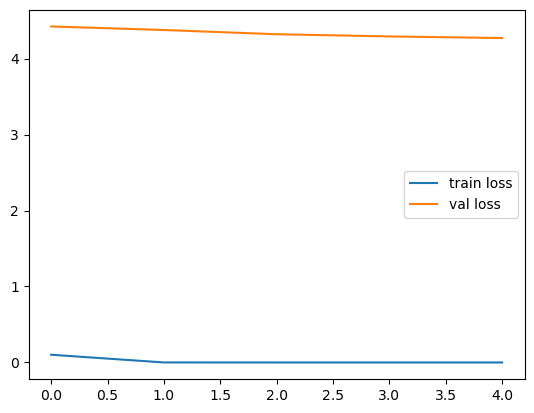

<Figure size 640x480 with 0 Axes>

In [15]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')





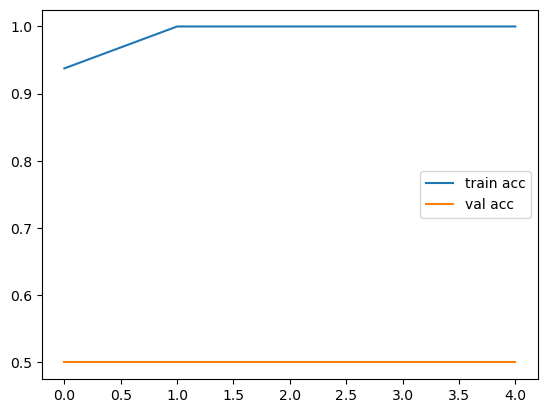

<Figure size 640x480 with 0 Axes>

In [16]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')